# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [82]:
%matplotlib inline

import pandas as pd
import numpy as np
import scipy.stats as st
import seaborn as sns
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [123]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [124]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

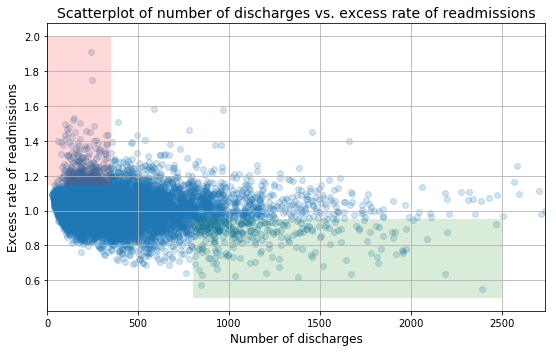

In [125]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [126]:
len(clean_hospital_read_df)

11578

In [127]:
#Number of missing values
len(clean_hospital_read_df)- clean_hospital_read_df.count()

Hospital Name                     0
Provider Number                   0
State                             0
Measure Name                      0
Number of Discharges              0
Footnote                      11497
Excess Readmission Ratio         81
Predicted Readmission Rate       81
Expected Readmission Rate        81
Number of Readmissions           81
Start Date                        0
End Date                          0
dtype: int64

In [128]:
len(clean_hospital_read_df)

11578

Since the number of missing values of 'Excess Readmission Ratio' is 81, less than 5% of 11578, they can be dropped.

In [133]:
clean_hospital_read_df.dropna(subset=['Excess Readmission Ratio','Predicted Readmission Rate','Number of Readmissions'], 
                              inplace=True)


In [130]:
data= clean_hospital_read_df

In [131]:
len(data)

11497

In [107]:
df= data[['Number of Discharges', 'Excess Readmission Ratio']]
df.describe()

,Number of Discharges,Excess Readmission Ratio
count,11497.000000,11497.000000
mean,365.466209,1.007504
std,308.754590,0.091964
min,25.000000,0.549500
25%,160.000000,0.952600
50%,282.000000,1.003500
75%,474.000000,1.058100
max,6793.000000,1.909500


# Check the " In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1"

In [155]:

df_less_100 = data[(data['Number of Discharges'] < 100) & (data['Number of Discharges'] > 0)]

# 63% have excess readmission rate greater than 1
a= len(df_less_100) #number of hospitals with <100
data_less_100= df_less_100[(df_less_100["Excess Readmission Ratio"]>1)]
b= len(data_less_100["Excess Readmission Ratio"])
percentage=round((float(b)/a)*100,2)

mean_100 = df_less_100["Excess Readmission Ratio"].mean()

print 'The mean of excess readmission rate is :', '%.3f' %mean_100," and the excess readmission rate is: ",percentage, '%'


The mean of excess readmission rate is : 1.023  and the excess readmission rate is:  63.22 %


# Check the "In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1"

In [153]:
df_more_1000= data[(data['Number of Discharges'] > 1000)]
a= len(df_more_1000)
data_more_1000= df_more_1000[(df_more_1000['Excess Readmission Ratio']> 1)]
b= len(data_more_1000['Excess Readmission Ratio'])
Percentage=round((float(b)/a)*100,2)
mean_1000 = df_more_1000['Excess Readmission Ratio'].mean()

print 'The mean of excess readmission rate is :', '%.3f' %mean_1000," and the excess readmission rate is: ",Percentage, '%'


The mean of excess readmission rate is : 0.978  and the excess readmission rate is:  44.49 %


In [156]:
# Let's check if there is a significant difference between the means of data_less_100 and data_more_1000
# Null Hyphothesis: Ho: M1 - M2 = 0     # alpha = 0.01
# Alternative Hyphothesis: H1: M1 - M2 > 0
# two-sample t-test
two_sample = st.ttest_ind(data_more_1000['Excess Readmission Ratio'], 
                          data_less_100['Excess Readmission Ratio'])
print('The t-statistic is %.3f and the p-value is %.8f.' % two_sample)

The t-statistic is 6.055 and the p-value is 0.00000000.


Since p-value is 0.00000000. < alpha = 0.01, we reject the null and  there is a statistical difference between those two group of 'Number of Discharges'.

# Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?

In [111]:
# Check df_less_100 and df_more_100 datasets from histograms

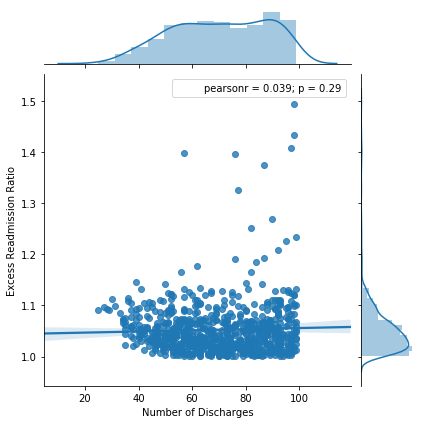

In [159]:
sns.jointplot('Number of Discharges', 'Excess Readmission Ratio', data=data_less_100, kind='reg')

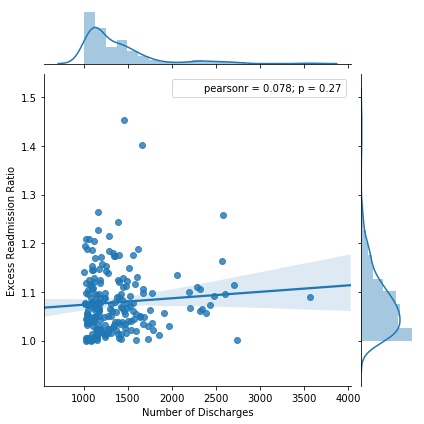

In [160]:
sns.jointplot('Number of Discharges', 'Excess Readmission Ratio', data=data_more_1000, kind='reg')

Based on pearsonr correlation results from the joint plots displayed above, correlation between 'Excess Readmission Ratio' and 'Number of Discharges' is higher in hospital capacity(Number of Discharges)>1000 than in hospital capacity(Number of Discharges)<100 with 'Excess Readmission Rate' >1 for both cases. 

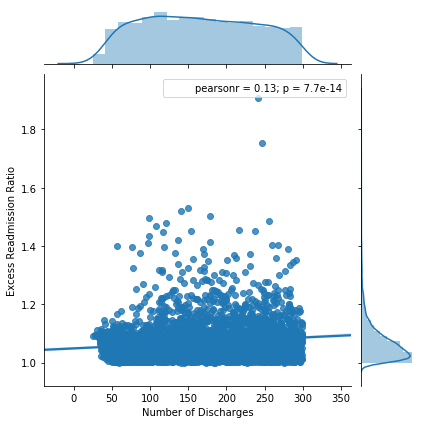

In [114]:
df_less_300= data[(data['Number of Discharges'] < 300)]
data_less_300= df_less_300[(df_less_300['Excess Readmission Ratio']> 1)]
sns.jointplot('Number of Discharges', 'Excess Readmission Ratio', data=data_less_300, kind='reg')

In [148]:
data_less_300[['Number of Discharges', 'Excess Readmission Ratio']].describe()

,Number of Discharges,Excess Readmission Ratio
count,3283.000000,3283.000000
mean,165.309473,1.069427
std,72.666962,0.069561
min,25.000000,1.000100
25%,105.000000,1.023800
50%,162.000000,1.052200
75%,226.000000,1.090450
max,299.000000,1.909500


In [161]:
data_more_1000[['Number of Discharges', 'Excess Readmission Ratio']].describe()

,Number of Discharges,Excess Readmission Ratio
count,206.000000,206.000000
mean,1368.834951,1.078737
std,396.906196,0.067573
min,1004.000000,1.000100
25%,1109.500000,1.030950
50%,1241.500000,1.065150
75%,1477.500000,1.109600
max,3570.000000,1.454300


Based on the findings related to changing values of 'Number of Discharges' and 'Excess Readmission Rate', we proved the statistical significance between two groups with really small p-value. However, difference between ratios under two different scenerio are close to each other. Thus, practical significance is not an issue under those two cases. As a result;

There is a significant correlation between hospital capacity (number of discharges) and readmission rates.
Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.
Policy recommendations:
Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.